In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('XRP-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date      Open      High       Low     Close  Adj Close      Volume
360 2023-03-18  0.380410  0.387869  0.373449  0.374433   0.374433   867351027
361 2023-03-19  0.374441  0.400006  0.374441  0.388465   0.388465  1189636323
362 2023-03-20  0.388374  0.392115  0.374033  0.374628   0.374628  1074222480
363 2023-03-21  0.374619  0.491367  0.374509  0.469710   0.469710  4178958939
364 2023-03-22  0.469651  0.474547  0.412934  0.422480   0.422480  3312385991


In [5]:
data = data[["Date", "Close"]]
print(data.head())

        Date     Close
0 2022-03-23  0.837887
1 2022-03-24  0.842968
2 2022-03-25  0.825127
3 2022-03-26  0.832772
4 2022-03-27  0.857343


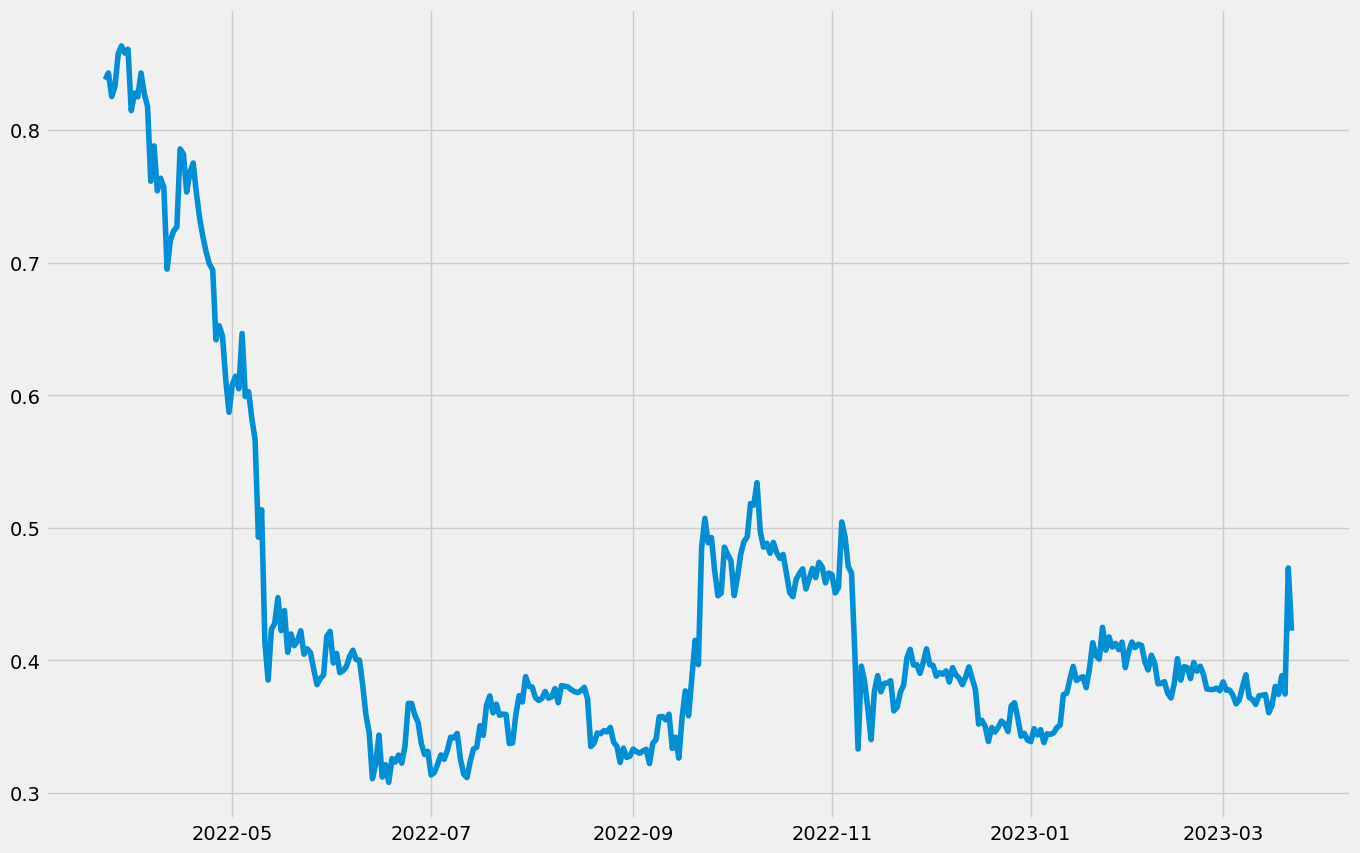

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

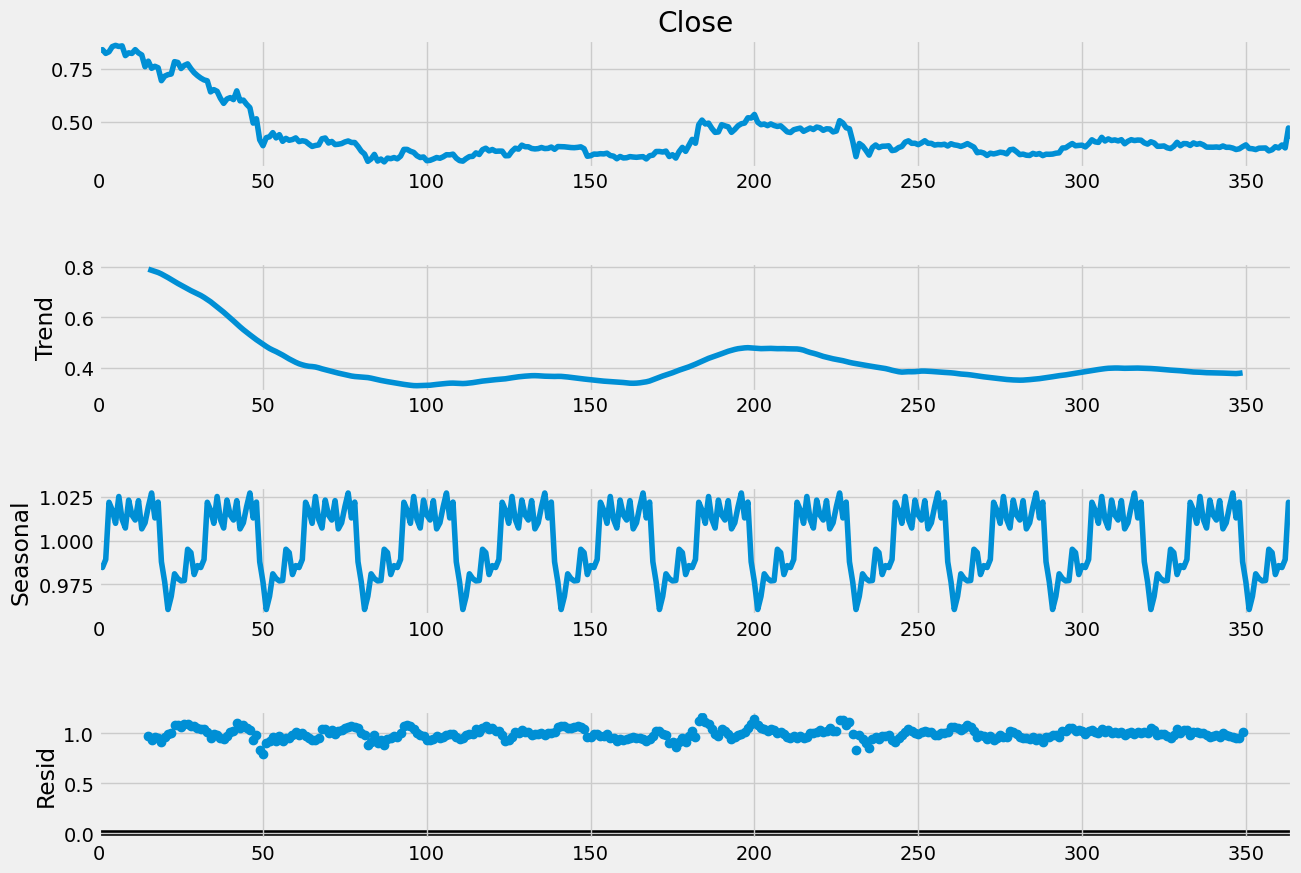

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period= 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

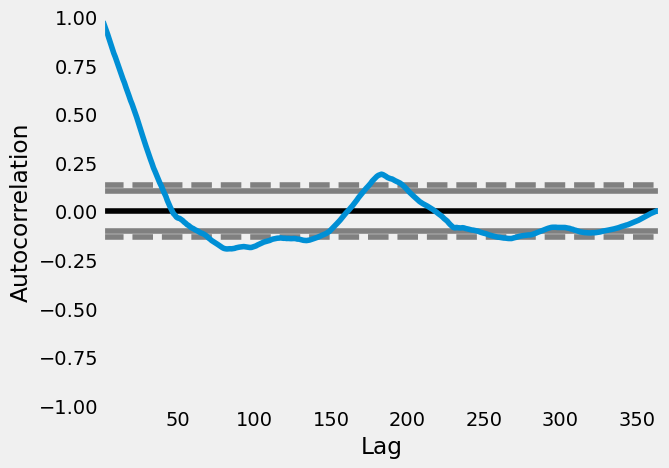

In [11]:
pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


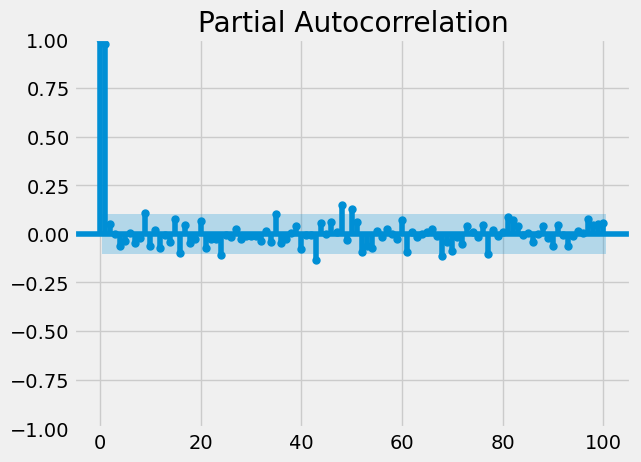

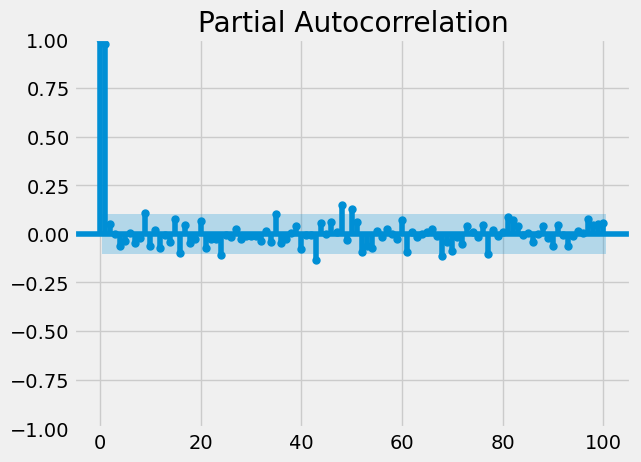

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [41]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fit = model.fit()  
print(fit.summary())

C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  365
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 938.879
Date:                Thu, 23 Mar 2023   AIC                          -1861.758
Time:                        22:55:10   BIC                          -1830.581
Sample:                             0   HQIC                         -1849.367
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6914      0.348     -1.984      0.047      -1.374      -0.008
ar.L2         -0.3007      0.363     -0.829      0.407      -1.012       0.410
ar.L3          0.0662      0.068      0.980      0.3

C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
predictions = fit.predict()
print(predictions)

0      0.000000
1      0.837887
2      0.842243
3      0.827731
4      0.831503
         ...   
360    0.377875
361    0.376844
362    0.388456
363    0.374752
364    0.456701
Name: predicted_mean, Length: 365, dtype: float64


In [43]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MSI MODERN 15A10M\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  365
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                 884.146
Date:                            Thu, 23 Mar 2023   AIC                          -1738.292
Time:                                    22:56:09   BIC                          -1680.338
Sample:                                         0   HQIC                         -1715.229
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0971      0.965     -0.101      0.920      -1.989       1.795
ar.L2          0.0606      0.730   

In [50]:
predictions = model.predict(len(data), len(data)+365)
print(predictions)

365    0.432086
366    0.441516
367    0.430316
368    0.430199
369    0.431176
         ...   
726    0.737962
727    0.735148
728    0.734780
729    0.732483
730    0.733353
Name: predicted_mean, Length: 366, dtype: float64


<AxesSubplot:>

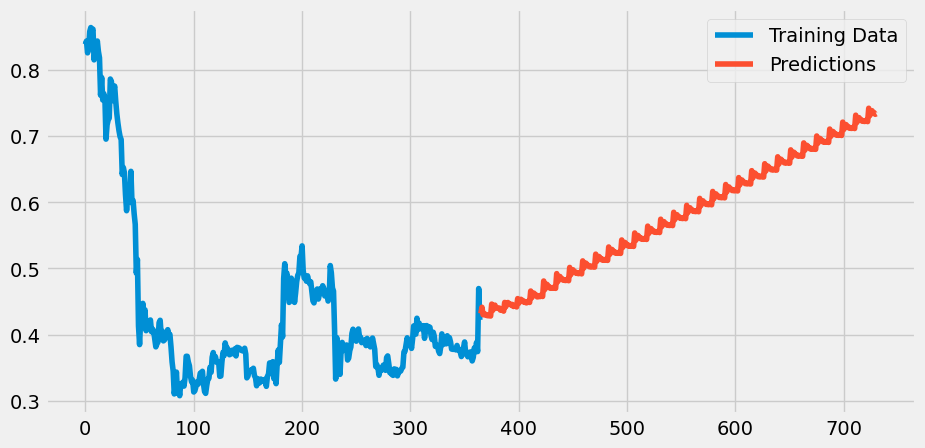

In [51]:
data["Close"].plot(legend=True, label="Training Data", figsize=(10, 5))
predictions.plot(legend=True, label="Predictions")